In [1]:
using Plots

In [2]:
pyplot(size=(800,600))

Plots.PyPlotBackend()

# A07 Entropische Feder

Die folgende Zelle ausfuehren um eine Trajektorie des Systems zu generieren.

In [3]:
N = 100
a,b = 1.,0.5
T = 1000 # Zeitschritte
L = zeros(Float64, T) # Laenge ueber die Zeit
S = zeros(Float64, T) # Entropie ueber die Zeit
C = ones(Int64, N)    # Anfangskonfiguration: Alle in Zustand b
t = 1
while t<=T
    # Die Einstellung eines Molekuels ist mod 2, d.h wir addieren pro Zeitschritt auf ein zufälliges C[i]+=1 und
    # pruefen dann ob gerade oder ungerade.
    L[t] = mapreduce(x->ifelse(x%2==0,a,b),+,C)
    S[t] = N*log(N) - (L[t]-b*N)/(a-b)*log((L[t]-b*N)/(a-b)) - (L[t]-a*N)/(b-a)*log((L[t]-a*N)/(b-a))

    C[rand(1:N)] += 1
    
    t += 1
end

Man sieht wie die Entropie schnell einem Maximalwert zustrebt und dann im zeitliche Verlauf um diesen fluktuiert.



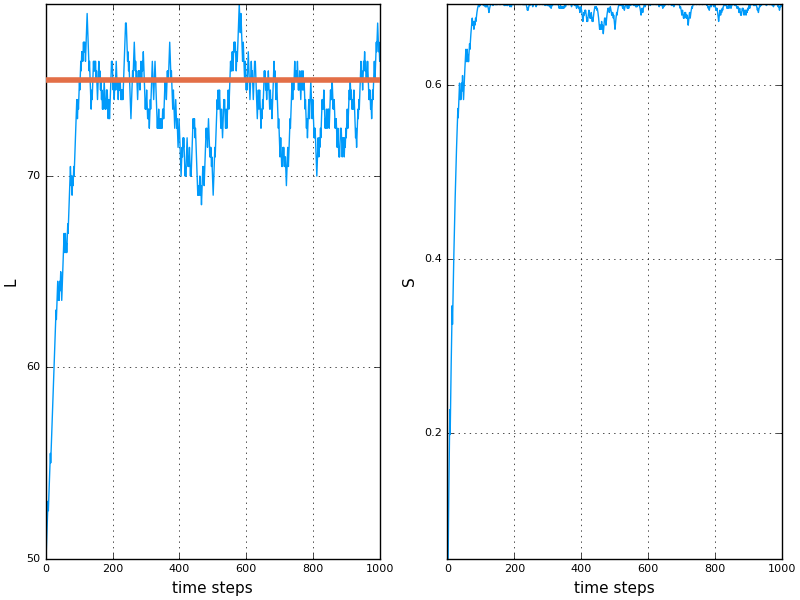

In [4]:
plot(1:T, [L S/N], layout=2, legend=:none, xlabel="time steps", ylabel=["L" "S"], xlim=(0,T))
plot!(1:T,x->N*(a+b)/2,linewidth=4)